<a href="https://colab.research.google.com/github/ddutta111/Multiple-Assets-Portfolio-Optimization-Risk-Management-Monte-Carlo-/blob/main/Portfolio_Optimization_of_Multiple_Assets_%26_Risk_Management(Monte_Carlo_Method).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio Optimization & Risk Management (Monte Carlo Method)**

# **Part 1: Portfolio Optimization**

# Business Problem Context:
Clients with diversified portfolios often hold a mix of risky assets, including stocks, commodities, ETFs, and high-yield bonds. While these investments have the potential for substantial returns, they also carry significant risk. The challenge for financial advisors and portfolio managers is to construct a portfolio that maximizes returns while minimizing risk, tailored to the client’s specific financial goals and risk tolerance.

Objective:
The goal is to identify the optimal portfolio composition that offers the highest possible return along with the lowest level of risk. This involves selecting and weighting assets in a way that balances the trade-off between risk and return, ultimately providing the client with a portfolio that aligns with their investment objectives and to measure the risk of the portfolio we calculate the VaR by using Monte Carlo Simulation Method (Using 20000 simulation).

Solution Approach:
To achieve this, the Sharpe ratio, a widely recognized portfolio performance metric, will be employed. The Sharpe ratio measures the excess return per unit of risk, allowing us to evaluate the efficiency of the portfolio. By maximizing the Sharpe ratio, we can find the portfolio that provides the highest return relative to its risk, ensuring that the client’s investment strategy is both effective and efficient.

Outcome:
The optimized portfolio will provide the client with a strategic asset allocation that not only meets their return expectations but also minimizes exposure to unnecessary risk. This balanced approach will help in achieving long-term financial goals, while also providing peace of mind through managed risk measurement & exposure.

# Section I: Importing the required libraries for optimal portfolio analysis

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Defining Tickers & Time Range

Defining the tickers of Multiple Asset Classes

UK FTSE 100 Stock Index -> UKX

S&P 500 U.S Stock Market Index -> SPY

SPDR Gold Shares ETF (Largest Commodity Based ETFs Index) -> GLD

Nasdaq ETF Index -> QQQ

Vanguard Total Bond Market ETF (Most popular Bond Index) -> BND

Morgan Stanley Capital International Indices -> MSC

Vanguard Total Stock Market ETF -> VTI



In [ ]:
tickers = ['UKX', 'SPY', 'GLD', 'QQQ', 'BND', 'MSCI', 'VTI']

Setting up the end date to Today

In [ ]:
end_date = datetime.today()

Setting up the starting date 10 years ago

In [ ]:
start_date = end_date - timedelta(days = 10*365)

# Section II: Downloading the Adjusted Closing Prices of the Multiple Asset-Class Indexes

Creating an Empty DataFrame to Store the Adjusted Closing Prices

In [ ]:
adj_close_df = pd.DataFrame()

Download The Closing Prices for Each Tickers above

In [ ]:
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Displaying the Data

In [ ]:
print(adj_close_df)

                   UKX         SPY         GLD         QQQ        BND  \
Date                                                                    
2014-08-18  674.130005  165.193039  124.959999   90.552963  62.677395   
2014-08-19  677.929993  166.055176  124.680000   91.060379  62.669800   
2014-08-20  675.549988  166.498749  124.220001   91.060379  62.578453   
2014-08-21  677.770020  166.984222  122.879997   91.244904  62.646961   
2014-08-22  677.530029  166.724747  123.190002   91.383301  62.646961   
...                ...         ...         ...         ...        ...   
2016-06-29  636.010010  180.203049  125.839996  100.242126  67.289993   
2016-06-30  650.429993  182.662064  126.470001  101.401894  67.377922   
2016-07-01  657.780029  183.045746  128.410004  101.911095  67.565285   
2016-07-05  654.539978  181.729080  129.470001  101.288742  67.797516   
2016-07-06  646.359985  182.819031  130.229996  102.118561  67.917633   

                 MSCI        VTI  
Date           

# Section III: Calculating the Log Normal Retuns of Assets

Calculate the Lognormal Returns for each Tickers

In [ ]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))

Taking Care of Missing Values

In [ ]:
log_returns = log_returns.dropna()

# Section IV: Co-Variance Matrix

Calculate the Covariance Matrix using annualized log returns

In [ ]:
cov_matrix = log_returns.cov()*252
print(cov_matrix)

           UKX       SPY       GLD       QQQ       BND      MSCI       VTI
UKX   0.032499  0.017071 -0.005740  0.018051 -0.001113  0.018927  0.017128
SPY   0.017071  0.023177 -0.004927  0.025717 -0.001491  0.023269  0.023190
GLD  -0.005740 -0.004927  0.026200 -0.006456  0.001940 -0.007121 -0.004817
QQQ   0.018051  0.025717 -0.006456  0.032457 -0.001632  0.025801  0.025751
BND  -0.001113 -0.001491  0.001940 -0.001632  0.001145 -0.001859 -0.001507
MSCI  0.018927  0.023269 -0.007121  0.025801 -0.001859  0.047709  0.023487
VTI   0.017128  0.023190 -0.004817  0.025751 -0.001507  0.023487  0.023361


The covariance matrix shows here the relationships between the returns of different assets in a multi-asset portfolio. Here's a brief interpretation:

Diagonal Elements (e.g., UKX with UKX, SPY with SPY): These represent the variances of each asset's returns. Higher values on the diagonal indicate greater volatility (e.g., QQQ has the highest variance at 0.032457, meaning it is the most volatile).

Off-Diagonal Elements (e.g., UKX with SPY, SPY with GLD): These represent the covariances between the returns of two different assets. Positive values indicate that the assets tend to move in the same direction (e.g., UKX and SPY have a covariance of 0.017071, suggesting a positive correlation). Negative values indicate that the assets tend to move in opposite directions (e.g., SPY and GLD have a covariance of -0.004927, suggesting a slight negative correlation).

Low or Negative Covariances (e.g., GLD with UKX, BND with QQQ): These suggest that these assets can help reduce overall portfolio risk through diversification, as their returns do not move in tandem.

Overall, the covariance matrix helps in understanding the risk and return dynamics within the portfolio, guiding the construction of an optimized portfolio by balancing assets that offer diversification benefits.

# Section V: Defining The Portfolio Performance Matrix

**Calculate the Portfolio Standard Deviation**

Below we calculate the portfolio variance, which is measure of risk associated with portfolio of multiple assets. It represents the combined volatality of the assets in the portfolio, taking into account their individual volatality and correlations.

In [ ]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

**Calculate the Expected Return of Portfolio**

Assumption: Expected Returns are Based on Historical Returns for simplification purpose

In [ ]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

**Calculate the Sharp Ratio Matrix**

The Sharpe ratio is a measure of risk-adjusted return, calculated as:

**Sharpe Ratio = (Portfolio Return - Risk Free Rate (Rf)) / Standard Deviation of Portfolio Returns**

It represents how much excess return you are receiving for the extra volatility you endure for holding a riskier asset.


In [ ]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

In [ ]:
!pip install fredapi
from fredapi import Fred

# Section VI: Portfolio Optimization

Calculating the Risk Free Rate (rf)

In [ ]:
fred = Fred(api_key='778e0a0b2a1dc1f46d0979a2f79ef915')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100

# Setting up as Risk_Free Rate
rf = ten_year_treasury_rate.iloc[-1]
print(rf)

0.0425


Define the function to minimize the Negative Sharp Ratio

In the case of scipy.optimize.minimize() function, there is no direct method to find the maximum value of a function.

In [ ]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

Constraints are conditions that must be met by teh solutions during the optimization process. Here, the constaint is that sum of all portfolio weights must be equal to 1. The "Constraints" variable is a dictionary with two keys: 'type' and 'fun where type is set as 'eqc'that is 'equality constraints' and fun is assigned the function check_sum; whic checks if the sum of the portfolio weights = 1.

Bounds are the limits placed on variables during the optimization process. Here, the variables are the portfolio weights and each weights should be between 0 and 1.

Set the Constraints Bound

In [ ]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]

Set the Initial Weights

In [ ]:
initial_weights = np.array([1/len(tickers)]*len(tickers))
print(initial_weights)

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


Optimize the Weights to Maximixe the Sharp Ratio

"SLSQP" stands for Sequential Least Squares Quardritic Programming which is numarical optimization technique suitable for solving non-linear optimization problems with constraints.

In [ ]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, rf), method='SLSQP', constraints=constraints, bounds=bounds)

Get the Optimal Weights

In [ ]:
optimal_weights = optimized_results.x

# Section VII: Analysis of the Optimal Portfolio

Visualize the Optimal Portfolio Analytics

In [ ]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, rf)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
UKX: 0.0000
SPY: 0.0000
GLD: 0.0377
QQQ: 0.0000
BND: 0.5000
MSCI: 0.4623
VTI: 0.0000
Expected Annual Return: 0.1608
Expected Volatility: 0.0974
Sharpe Ratio: 1.2150


# Explanation:

The optimal portfolio result based on the given weights indicates a strategy focused on maximizing returns while minimizing risk:

Multiple Asset Allocations:

GLD: 3.77%
BND: 50.00%
MSCI: 46.23%
UKX, SPY, QQQ, VTI: 0.00%

*Portfolio Composition:*

The portfolio heavily invests in BND (Vanguard Total Bond Market ETF) and MSCI (MSCI Index-related assets), making up almost the entire portfolio. This suggests a preference for bonds and diversified global equities, which are expected to provide stability and diversification.

A small allocation to GLD (Gold) suggests a strategy to hedge against inflation or market volatility, as gold often performs well during economic uncertainty.

No allocation to UKX, SPY, QQQ, or VTI implies that these assets do not contribute significantly to the risk-adjusted return, or they may increase the portfolio's volatility without providing sufficient return or other assets have significantly overperformed in teh portfolio.

*Performance Metrics:*

**Expected Annual Return:** 16.08%—indicating a strong potential return for the portfolio.

**Expected Volatility:** 9.74%—showing that the portfolio has moderate risk.

**Sharpe Ratio:** 1.215 suggests: For every unit of risk (measured by standard deviation) the portfolio has taken, it has generated 1.21 units of excess return over the risk-free rate. This ratio indicates a good risk-adjusted return. Typically, a Sharpe ratio above 1.0 is considered favorable. The higher the Sharpe ratio, the better the portfolio’s risk-adjusted performance.

# Final Visual Presentation of the Portfolio in Plot

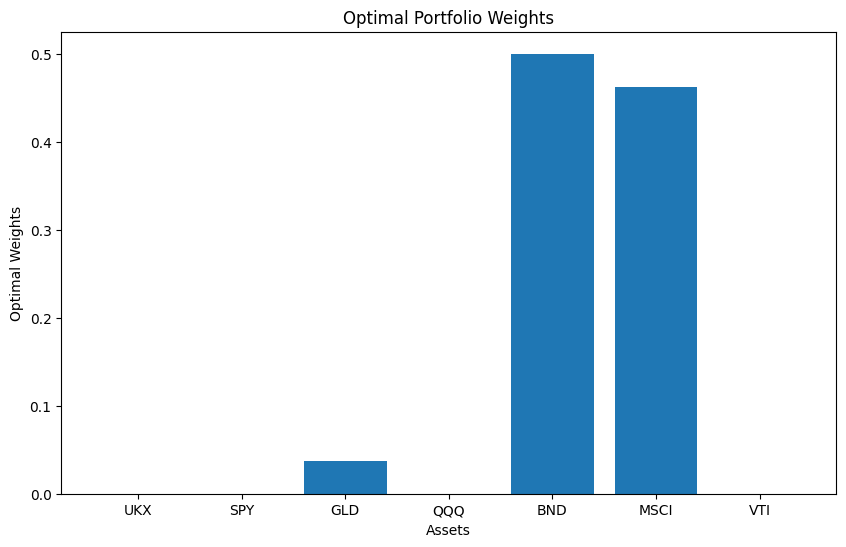

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

# Conclusion on Optimal Portfolio

The optimal portfolio graph over the last 10 years reveals a well-balanced and conservative strategy designed to maximize returns while minimizing risk. By heavily weighting bonds and diversified global equities, with a modest allocation to gold for additional stability, this portfolio aims to achieve strong returns with effective risk management. The impressive Sharpe ratio underscores its strong risk-adjusted performance, making it an attractive choice for investors seeking both stability and growth.

## **Part 2: Value at Risk Measurement (VaR) by Monte Carlo Simulation Method**

# Section VIII: Creating an Equally Weighted Portfolio & Finding a Total Portfolio Expected Return and Standard Deviation

In [ ]:
#Assuming portfolio estimates total = $2million and we take equal weights for 7 assets = 14.29%
portfolio_value = 2000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

# Section IX: Defining Functions for Monte Carlo Simulaton

Creating a Function that gives a random Z-Score based on Normal Distribution

In [ ]:
def random_z_score():
    return np.random.normal(0, 1)

Creating a Function to Calculate Scenario of Gain & Loss

In [ ]:
days = 5

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

Running 20000 Monte carlo Simulations

In [ ]:
simulations = 20000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

# Section X: Calculating Value at Risk (VaR) by Specifying a Confidence Interval

In [ ]:
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

69744.52442953481


**Summary of Result**

The Value at Risk (VaR) of $69744.52 for a portfolio of 7 assets, with a 95% confidence level over a 5-day period, indicates the potential loss that the portfolio could experience with 95% confidence. Here’s a brief explanation of the result:

*Interpretation of VaR:*

VaR Value:

The VaR of $69744.52 means -
that there is a 95% chance that the portfolio will not lose more than this amount over the next 5 days.

In other words, there is a 5% chance that the portfolio could lose more than $69744.52 within this period.


# Plotting the results of 10000 Scenarios gnerated by MonteCarlo Simulation

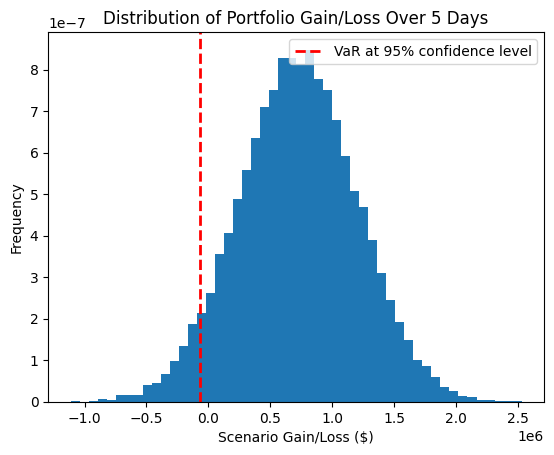

In [ ]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

# Conclusion on VaR of the Portfolio

From the above plot we come to the conclusin that the distribution of portfolio gains and losses over a 5-day period with the Value at Risk (VaR) at the 95% confidence level indicated by a red dashed line.

The distribution graph shows that under most scenarios, the portfolio is likely to result in a gain. However, the VaR at the 95% confidence level, indicated by the red dashed line, shows that there is a 5% chance the portfolio could lose more than a certain amount over the 5-day period. The left tail of the distribution (where the VaR line falls) represents the potential for these extreme losses.